In [1]:
# Impotação e instalação de Bibliotecas para modelagem dos dados

!pip install plotly
!pip install nbformat
!pip install --upgrade nbformat
import pandas as pd
import numpy as np
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 KB 7.0 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.1
    Uninstalling nbformat-5.7.1:
      Successfully uninstalled nbformat-5.7.1


In [2]:
# Leitura e visualização das bases de dados

from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("CCEE_BR_Data.csv.zip", 'r') as zObject:

  zObject.extractall(path="")

table = pd.read_csv('CCEE_BR_Data.csv', encoding='UTF-8')
table

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
0,01/07/2018,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01,0
1,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.00,0
2,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0.68,0
3,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,SC,1.88,0
4,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.04,0
...,...,...,...,...,...,...,...
418606,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,DF,689.19,1
418607,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,AC,121.34,1
418608,19/06/2020,Distribuidor,ACR,SUL,SC,2012.83,1
418609,19/06/2020,Distribuidor,ACR,SUL,RS,2310.67,1


In [27]:
((table[table['Classe'] == 'Exportador'])['Consumo']).sum()

0.0

In [ ]:
# Especificação do número de linhas e colunas da tabela

print(f'QUANTIDADE DE LINHAS: {table.shape[0]}\n')
print(f'QUANTIDADE DE COLUNAS: {table.shape[1]}')

QUANTIDADE DE LINHAS: 418611

QUANTIDADE DE COLUNAS: 7


In [ ]:
# Tipos de variáveis de cada coluna e quantidade de valores não-nulos da base geral

table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418611 entries, 0 to 418610
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Data        418611 non-null  object 
 1   Classe      418611 non-null  object 
 2   Ramo        418611 non-null  object 
 3   Submercado  418611 non-null  object 
 4   UF          418611 non-null  object 
 5   Consumo     418611 non-null  float64
 6   Covid       418611 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 22.4+ MB


In [ ]:
# Quantidade de dados nulos em cada coluna da base geral

table.isnull().sum()

Data          0
Classe        0
Ramo          0
Submercado    0
UF            0
Consumo       0
Covid         0
dtype: int64

In [ ]:
# Métricas estatísticas da tabela geral

table.describe()

,Consumo,Covid
count,418611.000000,418611.000000
mean,106.361081,0.130080
std,580.168023,0.336392
min,0.000000,0.000000
25%,1.620000,0.000000
50%,6.720000,0.000000
75%,30.255000,0.000000
max,14173.800000,1.000000


In [ ]:
# Lista das classes de consumidores de energia

table['Classe'].unique().tolist()

['Autoprodutor',
 'Comercializador Varejista',
 'Consumidor Especial',
 'Consumidor Livre',
 'Distribuidor',
 'Exportador']

In [ ]:
# Lista dos Ramos de consumidores de energia

table['Ramo'].unique().tolist()

['ALIMENTÍCIOS',
 'COMÉRCIO',
 'EXTRAÇÃO DE MINERAIS METÁLICOS',
 'MADEIRA PAPEL E CELULOSE',
 'MANUFATURADOS DIVERSOS',
 'METALURGIA E PRODUTOS DE METAL',
 'MINERAIS NÃO-METÁLICOS',
 'QUÍMICOS',
 'SERVIÇOS',
 'TÊXTEIS',
 'BEBIDAS',
 'SANEAMENTO',
 'TELECOMUNICAÇÕES',
 'TRANSPORTE',
 'VEÍCULOS',
 'ACR']

In [ ]:
# Lista das submercados consumidores de energia

table['Submercado'].unique().tolist()

['NORDESTE', 'SUDESTE / CENTRO-OESTE', 'SUL', 'NORTE']

In [ ]:
# Top 3 maiores Ramos Consumidores de Energia

table.groupby('Ramo')['Consumo'].sum().nlargest(3)

Ramo
ACR                               31044454.43
METALURGIA E PRODUTOS DE METAL     3375629.15
QUÍMICOS                           1411042.58
Name: Consumo, dtype: float64

In [ ]:
# Consumo de Energia agrupado por estado (Jul/2018 - Jun/2020)

table.groupby('UF')['Consumo'].sum().sort_values(ascending=True)

UF
AC        88930.69
AP       153841.11
TO       224248.34
RO       322593.60
SE       339587.65
PI       391059.73
AL       407784.71
MS       509103.34
PB       517163.06
RN       522526.78
DF       593988.01
MA       720995.25
AM       753955.16
MT       803951.18
ES      1026721.42
CE      1158800.26
PE      1417378.47
GO      1486370.87
PA      1725883.96
SC      2263545.92
BA      2447270.38
RS      2761001.32
PR      2790061.68
RJ      4154876.09
MG      5072253.44
SP     11870026.25
Name: Consumo, dtype: float64

In [ ]:
# Top 10 maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top10 = table.groupby('UF')['Consumo'].sum().nlargest(10)
table_top10

UF
SP     11870026.25
MG      5072253.44
RJ      4154876.09
PR      2790061.68
RS      2761001.32
BA      2447270.38
SC      2263545.92
PA      1725883.96
GO      1486370.87
PE      1417378.47
Name: Consumo, dtype: float64

# Início: Análise Aldenis

### Top 5 Maiores Estados Consumidores de Energia por Ramo

In [3]:
# Top 5 maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top5 = pd.DataFrame(table.groupby('UF')['Consumo'].sum().nlargest(5))
table_top5.reset_index(['UF'], inplace=True)
uf_top5 = table_top5['UF'].tolist()
uf_top5

['SP', 'MG', 'RJ', 'PR', 'RS']

In [4]:
# Dataframes dos 5 maiores estados consumidores de energia por ramo no período 
#de julho/2018 até junho/2020.

lista_df = []

for i, uf in enumerate(uf_top5):
  df_uf = table['UF'][table['UF'] == uf]
  df_primeiro = pd.DataFrame(table.groupby([df_uf,'Ramo'])['Consumo'].sum().nlargest(5))
  df_primeiro.reset_index(['UF', 'Ramo'], inplace=True)
  lista_df.append(df_primeiro)

In [ ]:
# Total de energia consumida dos 5 maiores estados consumidores por ramo no
# período de julho/2018 até junho/2020.

for df, uf in enumerate(uf_top5):

  fig_uf_ramo = px.bar(lista_df[df], x='Ramo', y='Consumo',title=f'Os 5 Maiores Ramos Consumidores de Energia em {uf} (Jul/2018 - Jun/2020)',
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Ramo": 'Ramos'})
  fig_uf_ramo.show()


  fig_uf_ramo_pie = px.pie(lista_df[df], values='Consumo', names=lista_df[df].columns[1],
                        title=f'Os 5 Maiores Ramos Consumidores de Energia em {uf} (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo (MWm) ',
                           "Ramo": 'Ramo'})

  fig_uf_ramo_pie.show()

###Top 5 Maiores Ramos Consumidores de Energia por Estado (UF)

In [6]:
# Top 5 maiores Ramos Consumidores de Energia (Jul/2018 - Jun/2020)

table_top5 = pd.DataFrame(table.groupby('Ramo')['Consumo'].sum().nlargest(5))
table_top5.reset_index(['Ramo'], inplace=True)
ramo_top5 = table_top5['Ramo'].tolist()
ramo_top5

['ACR',
 'METALURGIA E PRODUTOS DE METAL',
 'QUÍMICOS',
 'MINERAIS NÃO-METÁLICOS',
 'ALIMENTÍCIOS']

In [7]:
# Dataframes dos 5 maiores ramos consumidores de energia por estado no período 
#de julho/2018 até junho/2020.

lista_df = []

for i, ramo in enumerate(ramo_top5):
  df_ramo = table['Ramo'][table['Ramo'] == ramo]
  df_primeiro = pd.DataFrame(table.groupby([df_ramo,'UF'])['Consumo'].sum().nlargest(5))
  df_primeiro.reset_index(['UF', 'Ramo'], inplace=True)
  lista_df.append(df_primeiro)

In [11]:
# Total de energia consumida dos 5 maiores ramos consumidores por estado no
# período de julho/2018 até junho/2020.

for df, ramo in enumerate(ramo_top5):

  fig_uf_ramo = px.bar(lista_df[df], x='UF', y='Consumo',title=f'Os 5 Maiores Estados Consumidores de Energia em {ramo} (Jul/2018 - Jun/2020)',
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "UF": 'Estados'})
  fig_uf_ramo.show()


  fig_uf_ramo_pie = px.pie(lista_df[df], values='Consumo', names=lista_df[df].columns[1],
                        title=f'Os 5 Maiores Ramos Consumidores de Energia em {ramo} (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo (MWm) ',
                           "Ramo": 'Ramo'})

  fig_uf_ramo_pie.show()

###Classes Consumidoras de Energia por Ramo

In [14]:
# Classes Consumidoras de Energia (Jul/2018 - Jun/2020)

table_cls = pd.DataFrame(table.groupby('Classe')['Consumo'].sum()).sort_values('Consumo', ascending=False)
table_cls.reset_index(['Classe'], inplace=True)
classes = table_cls['Classe'].tolist()
classes

['Distribuidor',
 'Consumidor Livre',
 'Consumidor Especial',
 'Autoprodutor',
 'Comercializador Varejista',
 'Exportador']

In [18]:
# Dataframes dos 5 maiores ramos consumidores de energia por estado no período 
#de julho/2018 até junho/2020.

lista_df = []

for i, classe in enumerate(classes):
  df_classe = table['Classe'][table['Classe'] == classe]
  df_primeiro = pd.DataFrame(table.groupby([df_classe,'Ramo'])['Consumo'].sum().nlargest(5))
  df_primeiro.reset_index(['Classe', 'Ramo'], inplace=True)
  lista_df.append(df_primeiro)

In [23]:
# Total de energia consumida dos 5 maiores ramos consumidores por estado no
# período de julho/2018 até junho/2020.

for df, classe in enumerate(classes):

  fig_classe_ramo = px.bar(lista_df[df], x='Ramo', y='Consumo',title=f'Os 5 Maiores Estados Consumidores de Energia em {classe} (Jul/2018 - Jun/2020)',
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "UF": 'Estados'})
  fig_classe_ramo.show()


  fig_classe_ramo_pie = px.pie(lista_df[df], values='Consumo', names=lista_df[df].columns[1],
                        title=f'Os 5 Maiores Ramos Consumidores de Energia em {classe} (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo (MWm) ',
                           "Classe": 'Classe'})

  fig_classe_ramo_pie.show()

#Término: Análise Aldenis

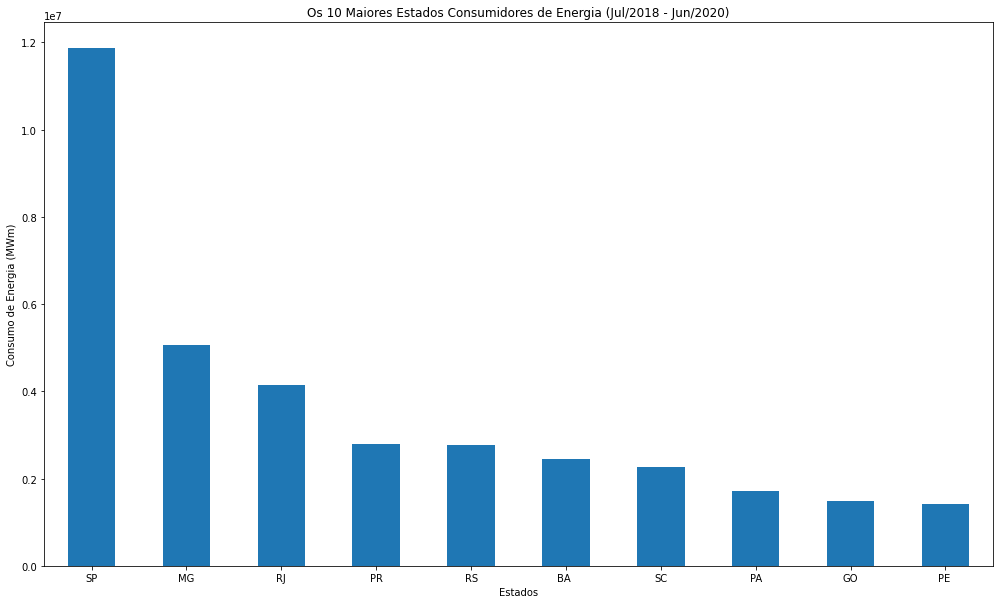

In [ ]:
# Visualização Gráfica dos 10 maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top10_bar = table_top10.plot(kind='bar', rot=0, xlabel='Estados', 
                                   ylabel='Consumo de Energia (MWm)',
    title='Os 10 Maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)', 
    figsize=(17,10))

In [ ]:
table.drop(columns='Covid', inplace=True)
table.rename(columns={'Consumo':'MWm'}, inplace=True)
table['Data'] = pd.to_datetime(table['Data'], format='%d/%m/%Y').dt.year
table_2019 = table.loc[(table['Data'] == 2019)]
table_2019

,Data,Classe,Ramo,Submercado,UF,MWm
102670,2019,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01
102671,2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.24
102672,2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0.19
102673,2019,Autoprodutor,ALIMENTÍCIOS,SUL,SC,0.15
102674,2019,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.11
...,...,...,...,...,...,...
312631,2019,Distribuidor,ACR,SUL,SC,2345.76
312632,2019,Distribuidor,ACR,SUL,RS,3569.17
312633,2019,Distribuidor,ACR,SUL,PR,2698.92
312634,2019,Exportador,SERVIÇOS,SUL,SC,0.00


In [ ]:
agregado = table_2019.groupby(by='Classe').agg(set)
agregado['MWm'] = [sum(x) for x in agregado['MWm']]
agregado.sort_values(by='MWm', ascending=False, inplace=True)
agregado

,Data,Ramo,Submercado,UF,MWm
Classe,,,,,
Distribuidor,{2019},{ACR},"{SUL, SUDESTE / CENTRO-OESTE, NORDESTE, NORTE}","{PI, AC, PR, SP, MT, AM, MG, TO, MS, PE , GO, ...",1.581386e+07
Consumidor Livre,{2019},"{EXTRAÇÃO DE MINERAIS METÁLICOS, MANUFATURADOS...","{SUL, SUDESTE / CENTRO-OESTE, NORDESTE, NORTE}","{PI, PR, SE, SP, MT, AM, MG, TO, MS, GO, CE, A...",3.400625e+06
Consumidor Especial,{2019},"{EXTRAÇÃO DE MINERAIS METÁLICOS, MANUFATURADOS...","{SUL, SUDESTE / CENTRO-OESTE, NORDESTE, NORTE}","{PI, AC, PR, SP, MT, AM, MG, TO, MS, PE , GO, ...",7.304708e+05
Autoprodutor,{2019},"{EXTRAÇÃO DE MINERAIS METÁLICOS, MANUFATURADOS...","{SUL, NORDESTE, SUDESTE / CENTRO-OESTE, NORTE}","{PR, SP, MT, MG, MS, PE , GO, CE, AL , ES, SC,...",6.625548e+05
Comercializador Varejista,{2019},"{MANUFATURADOS DIVERSOS, SANEAMENTO, MINERAIS ...","{NORDESTE, SUL, NORTE, SUDESTE / CENTRO-OESTE}","{MG, CE, PR, RJ, ES, SC, SP, DF , PA, PE , GO,...",3.478490e+03
Exportador,{2019},{SERVIÇOS},{SUL},"{RS, SC}",0.000000e+00


In [ ]:
fig = px.bar(agregado, x=agregado.index, y='MWm', color_discrete_sequence=['darkslateblue'], title='Consumo por classe em 2019')
fig.show()